In [1]:
from __future__ import division, print_function, absolute_import
import numpy as np
import matplotlib
import matplotlib.pyplot as pl
%matplotlib inline
matplotlib.rcParams.update({'font.size':16})

from astropy.coordinates import SkyCoord
from astropy.table import Table
from astropy.io import votable
from astropy.utils import data
data.conf.remote_timeout = 60 # default is 3 seconds

In [9]:
# VOTable - Draco
url_templ = 'http://gsss.stsci.edu/webservices/vo/CatalogSearch.aspx?CAT=PS1V3OBJECTS&RA={ra}&DEC={dec}&SR={rad}'
search_radius = 5/60. # degrees
gal = SkyCoord.from_name('Draco dSph')
ra = gal.ra.deg
dec = gal.dec.deg
url = url_templ.format(ra=ra,dec=dec,rad=search_radius)
tab = votable.parse_single_table(url).to_table()

ra1 = gal.ra.deg-1
dec1 = gal.dec.deg-1
url1 = url_templ.format(ra=ra1,dec=dec1,rad=search_radius)
taboff = votable.parse_single_table(url1).to_table()

In [11]:
# separate stars, only use ones with defined magnitudes and magstds (!= -999) 
star_tab = tab[tab['iMeanPSFMag']-tab['iMeanKronMag'] < 0.05]
star_tab = star_tab[(star_tab['gMeanPSFMag'] != -999)*\
                    (star_tab['iMeanPSFMag'] != -999)*(star_tab['rMeanPSFMag'] != -999)]
star_tab = star_tab[(star_tab['gMeanPSFMagStd'] != -999)*\
                    (star_tab['iMeanPSFMagStd'] != -999)*(star_tab['rMeanPSFMagStd'] != -999)]

star_taboff = taboff[taboff['iMeanPSFMag']-taboff['iMeanKronMag'] < 0.05]
star_taboff = star_taboff[(star_taboff['gMeanPSFMag'] != -999)*\
                          (star_taboff['iMeanPSFMag'] != -999)*(star_taboff['rMeanPSFMag'] != -999)]
star_taboff = star_taboff[(star_taboff['gMeanPSFMagStd'] != -999)*\
                          (star_taboff['iMeanPSFMagStd'] != -999)*(star_taboff['rMeanPSFMagStd'] != -999)]

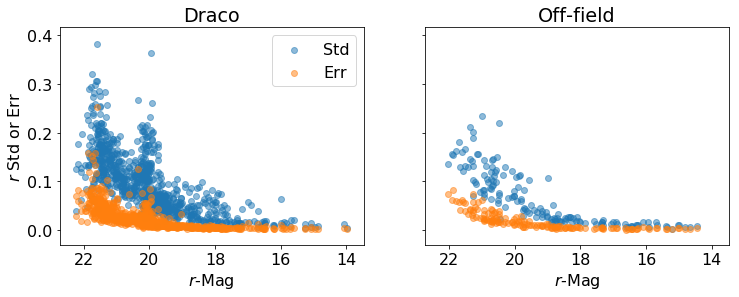

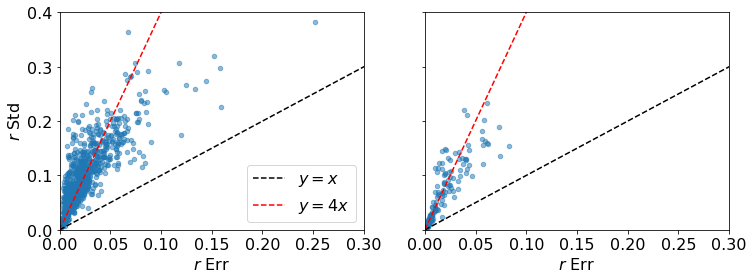

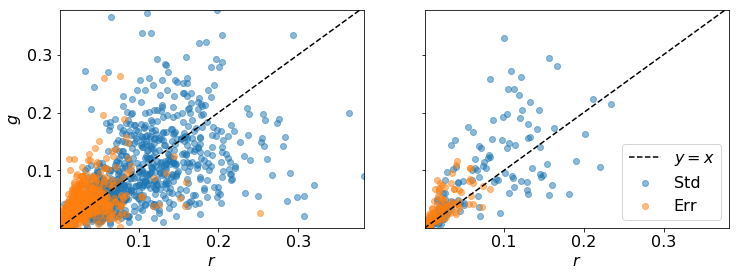

In [58]:
# Std and Err as function of Magnitude
f, (ax1, ax2) = pl.subplots(1,2,sharex=True,sharey=True,figsize=(12,4))
ax1.scatter(star_tab['rMeanPSFMag'],star_tab['rMeanPSFMagStd'],alpha=0.5,label='Std')
ax1.scatter(star_tab['rMeanPSFMag'],star_tab['rMeanPSFMagErr'],alpha=0.5,label='Err')
ax1.invert_xaxis()
ax1.set_xlabel(r'$r$-Mag')
ax1.set_ylabel(r'$r$ Std or Err')
ax1.set_title('Draco')
ax1.legend()
ax2.scatter(star_taboff['rMeanPSFMag'],star_taboff['rMeanPSFMagStd'],alpha=0.5,label='Std')
ax2.scatter(star_taboff['rMeanPSFMag'],star_taboff['rMeanPSFMagErr'],alpha=0.5,label='Err')
ax2.set_xlabel(r'$r$-Mag')
ax2.set_title('Off-field')

# Ratio of Std and Err in same band
f, (ax1, ax2) = pl.subplots(1,2,sharex=True,sharey=True,figsize=(12,4))
ax1.scatter(star_tab['rMeanPSFMagErr'],star_tab['rMeanPSFMagStd'],alpha=0.5,s=20,label='')
ax1.plot(np.linspace(0,1,10),np.linspace(0,1,10),linestyle='dashed',color='black',label=r'$y=x$')
ax1.plot(np.linspace(0,1,10),4*np.linspace(0,1,10),linestyle='dashed',color='red',label=r'$y=4x$')
ax1.set_xlabel(r'$r$ Err')
ax1.set_ylabel(r'$r$ Std')
ax1.set_ylim(0,0.4)
ax1.set_xlim(0,0.3)
ax1.legend()
ax2.scatter(star_taboff['rMeanPSFMagErr'],star_taboff['rMeanPSFMagStd'],alpha=0.5,s=20,label='')
ax2.plot(np.linspace(0,1,10),np.linspace(0,1,10),linestyle='dashed',color='black',label=r'$y=x$')
ax2.plot(np.linspace(0,1,10),4*np.linspace(0,1,10),linestyle='dashed',color='red',label=r'$y=4x$')
ax2.set_xlabel(r'$r$ Err')

# Ratio of g and r-band Std's and Err's
f, (ax1, ax2) = pl.subplots(1,2,sharex=True,sharey=True,figsize=(12,4))
ax1.scatter(star_tab['rMeanPSFMagStd'],star_tab['gMeanPSFMagStd'],alpha=0.5,label='Std')
ax1.scatter(star_tab['rMeanPSFMagErr'],star_tab['gMeanPSFMagErr'],alpha=0.5,label='Err')
ax1.set_ylim(0.001,star_tab['gMeanPSFMagStd'].max())
ax1.set_xlim(0.001,star_tab['rMeanPSFMagStd'].max())
ax1.plot(np.linspace(0,1,10),np.linspace(0,1,10),linestyle='dashed',color='black',label=r'$y=x$')
##ax1.set_xscale('log')
##ax1.set_yscale('log')
ax1.set_xlabel(r'$r$')
ax1.set_ylabel(r'$g$')
ax2.scatter(star_taboff['rMeanPSFMagStd'],star_taboff['gMeanPSFMagStd'],alpha=0.5,label='Std')
ax2.scatter(star_taboff['rMeanPSFMagErr'],star_taboff['gMeanPSFMagErr'],alpha=0.5,label='Err')
ax2.plot(np.linspace(0,1,10),np.linspace(0,1,10),linestyle='dashed',color='black',label=r'$y=x$')
ax2.set_xlabel(r'$r$')
ax2.legend()